In [161]:
import os
import sys
import datetime
import math 

print("Python virtualenv:", os.environ['CONDA_DEFAULT_ENV'])
print("Python version:", sys.version)

import tensorflow as tf
print("Tensorflow version:", tf.__version__)

tf.random.set_seed(1)

#from keras_tqdm import TQDMNotebookCallback
from livelossplot import PlotLossesKeras

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


Python virtualenv: tf
Python version: 3.8.15 | packaged by conda-forge | (default, Nov 22 2022, 08:42:03) [MSC v.1929 64 bit (AMD64)]
Tensorflow version: 2.11.0


In [31]:
class myModel:
    
    def __init__(self, layer1_dim, output_dim):
        
        self.layer1_dim = layer1_dim
        self.output_dim = output_dim
        
        self.model_ = tf.keras.Sequential([
            tf.keras.layers.Dense(self.layer1_dim, activation='relu'),
            tf.keras.layers.Dense(self.output_dim, activation='softmax')
        ])

        self.model_.compile(
            loss=tf.keras.losses.categorical_crossentropy,
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
            metrics=['accuracy']
        )
    
    
    def fit(self, X_train, Y_traint, X_validate=None, Y_validate=None):
        self.model_.fit(X_train, Y_train, epochs=100, validation_data=(X_validate, Y_validate), verbose=2, callbacks=[PlotLossesKeras()])#TQDMNotebookCallback()])
        return self

    def predict(self, X):
        self.predict_ = self.model_(X)
        return self.predict_


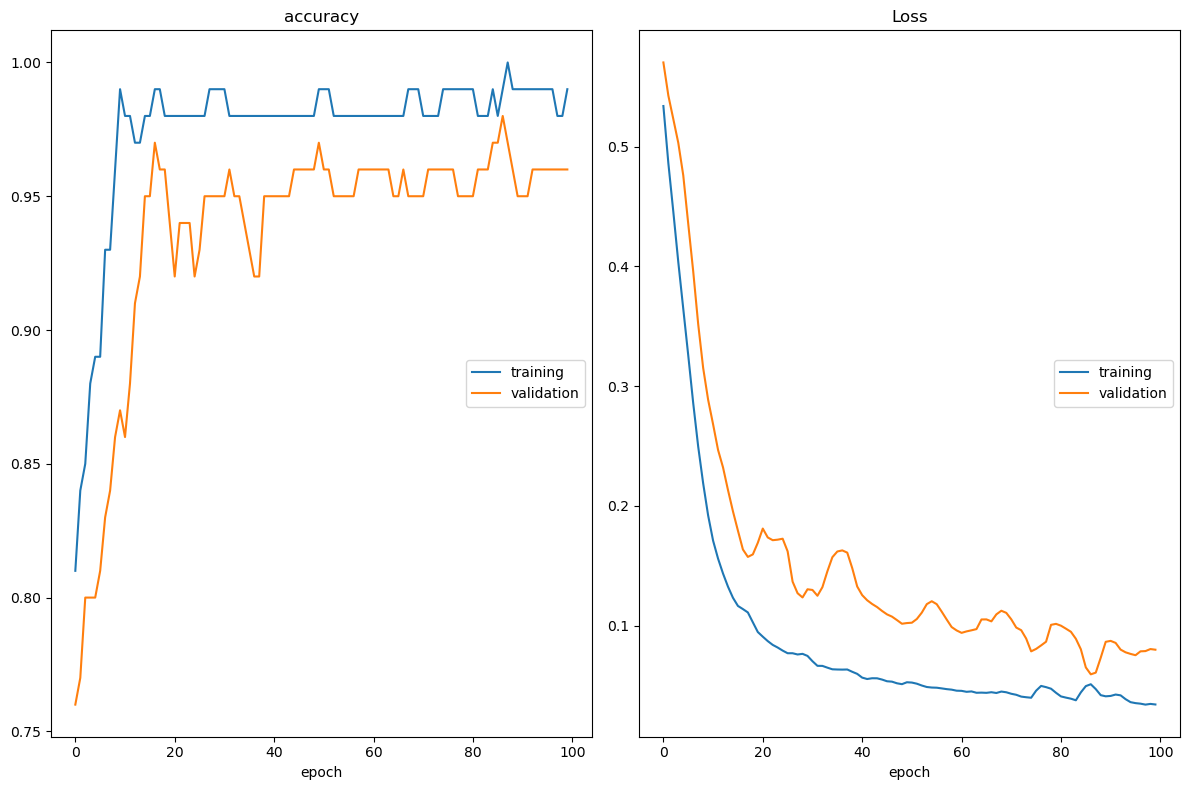

accuracy
	training         	 (min:    0.810, max:    1.000, cur:    0.990)
	validation       	 (min:    0.760, max:    0.980, cur:    0.960)
Loss
	training         	 (min:    0.034, max:    0.534, cur:    0.034)
	validation       	 (min:    0.059, max:    0.570, cur:    0.080)
4/4 - 0s - loss: 0.0341 - accuracy: 0.9900 - val_loss: 0.0798 - val_accuracy: 0.9600 - 332ms/epoch - 83ms/step


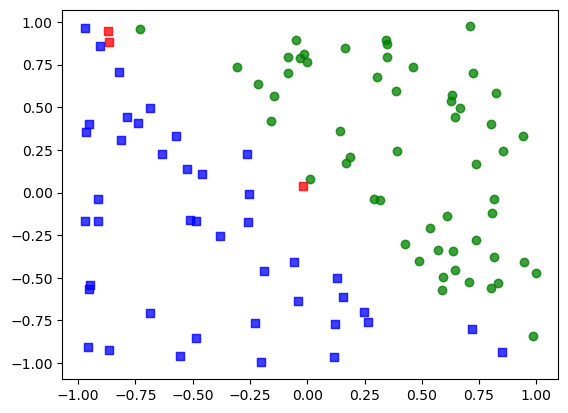

In [33]:


def generate_data(num_samples, num_features=2):
    X1 = 2*np.random.rand(num_samples,num_features) - 1
    Y1 = np.zeros((num_samples,2))
    if num_features==2:
        Y1[:,0] = np.where(X1[:,0]+X1[:,1]>0,1,0)
        Y1[:,1] = np.where(X1[:,0]+X1[:,1]>0,0,1)
    else:
        Y1[:,0] = np.where(X1[:,0]+X1[:,1]+X1[:,2]>0,1,0)
        Y1[:,1] = np.where(X1[:,0]+X1[:,1]+X1[:,2]>0,0,1)
        
    return X1, Y1

S=100 #number of samples
X_train, Y_train = generate_data(S)
X_validate, Y_validate = generate_data(S)
X_test, Y_test = generate_data(S)

model = myModel(1,2)
model.fit(X_train, Y_train, X_validate, Y_validate)
pred = model.predict(X_test)

marker = np.where(pred[:,0]>=0.5,"o","s")
color = np.where(Y_test[:,0]>0,"green","blue")
color = np.where((Y_test[:,0]>0) & (pred[:,0]<0.5) | (Y_test[:,1]>0) & (pred[:,1]<0.5),"red",color)

#plot the results
#marker are predicted values; colors are true values with red showing wrong classification
fig = plt.figure()
#ax = fig.add_subplot(projection='3d')
ax = fig.add_subplot()
for i in range(X_test.shape[0]):
    ax.scatter(X_test[i,0],X_test[i,1],c=color[i],marker=marker[i],alpha=0.5)
    ax.scatter(X_test[i,0],X_test[i,1],c=color[i],marker=marker[i],alpha=0.5)

plt.show()


In [18]:
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#rm -rf ./logs/

#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_validate, Y_validate), verbose=0, callbacks=[tensorboard_callback])

#%tensorboard --logdir logs/fit

In [258]:
def generate_ball(num_samples, num_features=2):

    X1 = 2*np.random.rand(num_samples,num_features) - 1

    Y1 = np.zeros((num_samples,2))
    Y1[:,0] = np.where(np.linalg.norm(X1,ord=None,axis=1)>0.4,1,0)
    Y1[:,1] = np.where(Y1[:,0]==1,0,1)
        
    return X1, Y1

def plot_ball(X, Y, pred, w):

    marker = np.where(pred[:,0]>pred[:,1],"o","s")
    color = np.where(Y[:,0]>0,"green","blue")
    color = np.where((Y[:,0]>0) & (pred[:,0]<pred[:,1]) | (Y[:,1]>0) & (pred[:,1]<pred[:,0]),"red",color)

    #plot the results
    #marker are predicted values; colors are true values with red showing wrong classification
    fig = plt.figure()
    #ax = fig.add_subplot(projection='3d')
    ax = fig.add_subplot()
    for i in range(X.shape[0]):
        ax.scatter(X[i,0],X[i,1],c=color[i],marker=marker[i],alpha=0.5)
        ax.scatter(X[i,0],X[i,1],c=color[i],marker=marker[i],alpha=0.5)

    circle = mpl.patches.Circle((0,0), radius=0.4, alpha=0.5, fill=True, color="blue")
    ax.add_patch(circle)
    
    w1 = w[0]
    b1 = w[1]
#    print("w1:",w1)
#    print("b1:",b1)

    n = w1.shape[1] #number of neurons, first layer
    colors = color = plt.cm.rainbow(np.linspace(0, 1, n))

    x=np.zeros_like(w1[0,:])
    y=np.zeros_like(w1[0,:])
    ax.quiver(x, y, w1[0,:], w1[1,:], color=colors)    

    x = np.linspace(-1,1,10)
    for i in range(w1.shape[1]): #number of neurons
        slope = -w1[0,i] / w1[1,i]
        intercept =  - b1[i] / w1[1,i]
        #print(colors[i], slope, intercept)
        y = slope * x + intercept
        plt.plot(x,y,"-",color=colors[i])
    
    
    ax.set_aspect('equal')
    plt.xlim(-1,1)
    plt.ylim(-1,1)

def plot_pred(model):
    x = np.arange(-1,1,0.01)
    y = np.arange(-1,1,0.01)
    g = np.meshgrid(x,y)
    gl = np.append(g[0].reshape(-1,1),g[1].reshape(-1,1),axis=1)

    p = model.predict(gl)
    pp = p[:,0] - p[:,1]  #certainty = proba class 0 - proba class 1
    gpp = pp.numpy().reshape(200,200).T

    fig, ax = plt.subplots()

    im = ax.imshow(gpp, interpolation='bilinear', origin='lower',
                   cmap=plt.cm.BrBG, extent=(-1, 1, -1, 1), alpha=1)

    levels = np.array([-0.6, 0.6])
    CS = ax.contour(gpp, levels, origin='lower', cmap='flag', extend='both',
                    linewidths=1, extent=(-1, 1, -1, 1))    

    ax.set_aspect('equal')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    
def reshape(w,b):
    #given the weights and biases of a layer Z = W.X+B
    #return the norms of the vectors in W, the adjusted weights B/norm, and the unit vectors
    tw = np.transpose(w)
    ntw = np.linalg.norm(tw,axis=1)  #norm of the direction vector of the neuron
    return ntw, b/ntw, np.transpose(tw/ntw[:,np.newaxis])


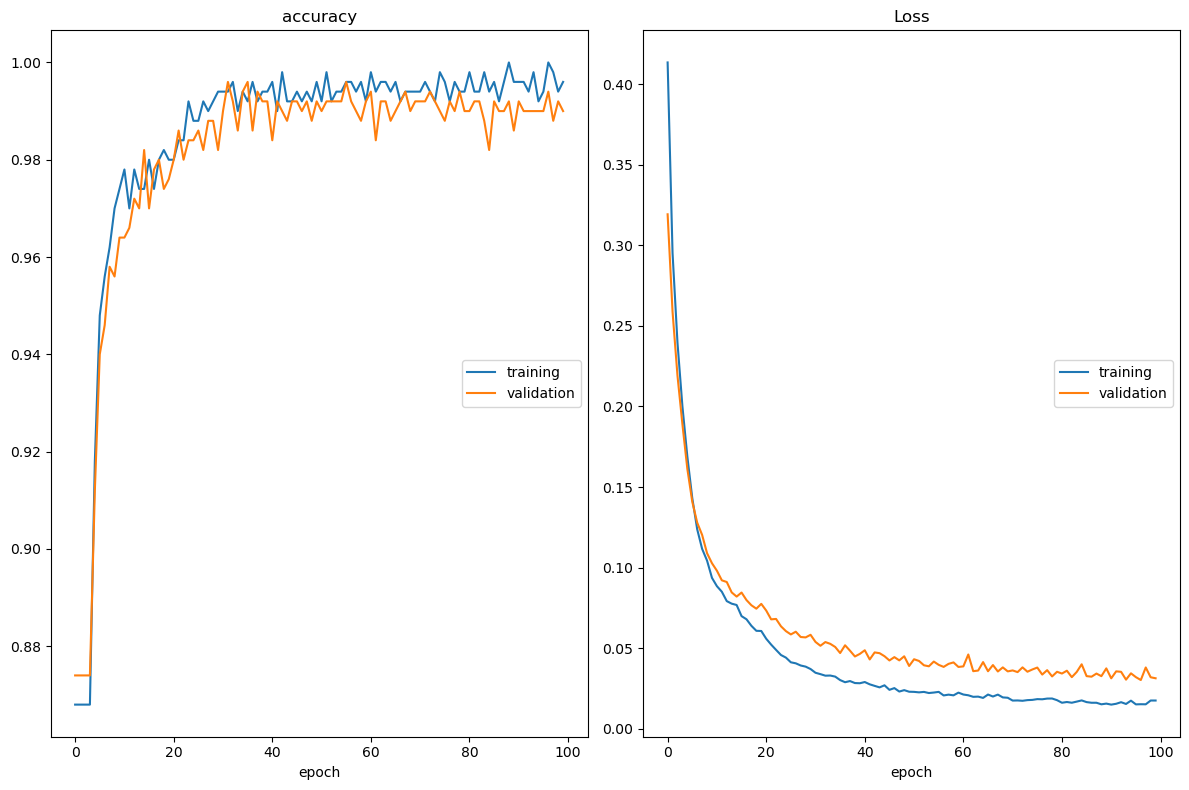

accuracy
	training         	 (min:    0.868, max:    1.000, cur:    0.996)
	validation       	 (min:    0.874, max:    0.996, cur:    0.990)
Loss
	training         	 (min:    0.015, max:    0.413, cur:    0.018)
	validation       	 (min:    0.030, max:    0.319, cur:    0.031)
16/16 - 0s - loss: 0.0176 - accuracy: 0.9960 - val_loss: 0.0314 - val_accuracy: 0.9900 - 387ms/epoch - 24ms/step
layer1 norms	: [4.9040546 4.3650618 4.677416  5.1355796]
layer1 thresholds	: [-0.1804877  -0.17839558 -0.17989829 -0.13526863]
layer1 directions	: [[ 0.20111202 -0.1342288   0.9701735  -0.99069625]
 [-0.9795683   0.9909504   0.24241173 -0.13609123]]
layer2 norms	: [ 8.5115795 10.077591 ]
layer2 thresholds	: [-0.5410825   0.45700073]
layer2 directions	: [[ 0.4292202  -0.5062426 ]
 [ 0.6831576  -0.52034825]
 [ 0.500095   -0.53359354]
 [ 0.31459582 -0.4338594 ]]


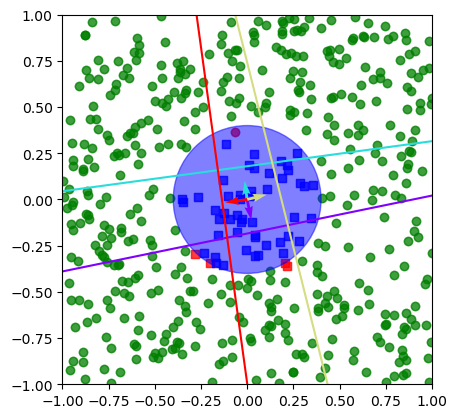

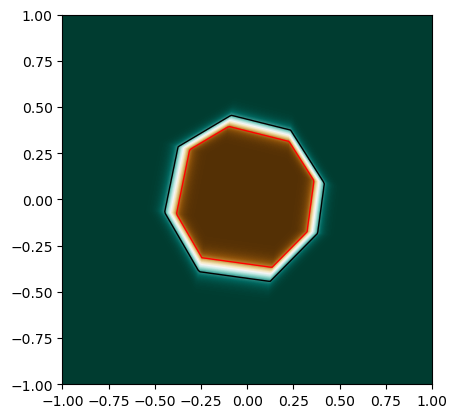

In [260]:

S=500 #number of samples
X_train, Y_train = generate_ball(S)
X_validate, Y_validate = generate_ball(S)
X_test, Y_test = generate_ball(S)

model = myModel(4, 2)

model.fit(X_train, Y_train, X_validate, Y_validate)
pred = model.predict(X_test)
 
w = model.model_.get_weights()

w1_n, w1_b, w1_dir = reshape(w[0],w[1])
print("layer1 norms\t:", w1_n)
print("layer1 thresholds\t:", w1_b)
print("layer1 directions\t:", w1_dir)

w2_n, w2_b, w2_dir = reshape(w[2],w[3])
print("layer2 norms\t:", w2_n)
print("layer2 thresholds\t:", w2_b)
print("layer2 directions\t:", w2_dir)

plot_ball(X_test, Y_test, pred, w)
plot_pred(model)

In [262]:
#model.model_.save('myModel')

INFO:tensorflow:Assets written to: myModel\assets


INFO:tensorflow:Assets written to: myModel\assets


layer1 norms	: [1. 1. 1. 1.]
layer1 thresholds	: [-0.4 -0.4 -0.4 -0.4]
layer1 directions	: [[ 1.e-04  1.e+00  1.e-04 -1.e+00]
 [ 1.e+00  1.e-04 -1.e+00  1.e-04]]
layer2 norms	: [1. 1.]
layer2 thresholds	: [-0.01  0.01]
layer2 directions	: [[ 0.5 -0.5]
 [ 0.5 -0.5]
 [ 0.5 -0.5]
 [ 0.5 -0.5]]


C:\Users\remyh\AppData\Local\Temp\ipykernel_21584\794684496.py:70: UserWarning: No contour levels were found within the data range.
  CS = ax.contour(gpp, levels, origin='lower', cmap='flag', extend='both',


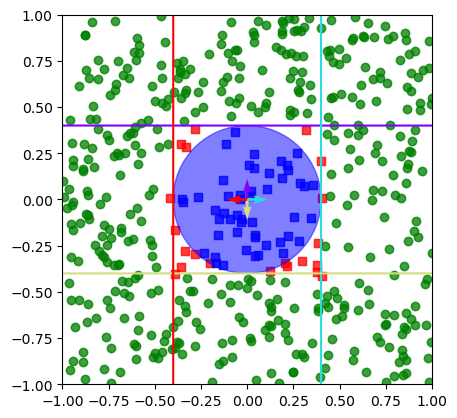

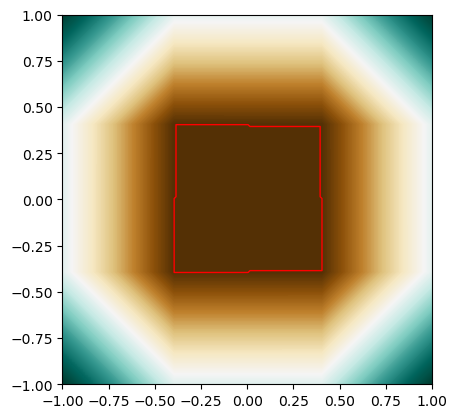

In [267]:

#SET THE WEIGHTS BY HAND

e=1e-4
s4=1/2

w1 = np.array(
    [[e,1,e,-1],
     [1,e,-1,e]])

b1 = np.array([-0.4,-0.4,-0.4,-0.4])

w2 = np.array(
    [[s4,-s4],
     [s4,-s4],
     [s4,-s4],
     [s4,-s4]])

b2 = np.array([-0.01,0.01])

model2 = myModel(4,2)
model2.model_ = tf.keras.models.load_model("myModel")
model2.model_.set_weights([w1,b1,w2,b2])

pred = model2.predict(X_test)
 
w = model2.model_.get_weights()

w1_n, w1_b, w1_dir = reshape(w[0],w[1])
print("layer1 norms\t:", w1_n)
print("layer1 thresholds\t:", w1_b)
print("layer1 directions\t:", w1_dir)

w2_n, w2_b, w2_dir = reshape(w[2],w[3])
print("layer2 norms\t:", w2_n)
print("layer2 thresholds\t:", w2_b)
print("layer2 directions\t:", w2_dir)

plot_ball(X_test, Y_test, pred, w)

plot_pred(model2)
